<a href="https://colab.research.google.com/github/mahmud-nobe/Physics_Simulation_Tutorial/blob/main/ising_model/Ising_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
class IsingModel(object):

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, length, temp = 300, h = 0):
        '''
        Initialize new IsingModel simulation with the default parameter
        settings.

        Inputs:
         * length: length of each dimencion of the cell.
         * temp: the temperature parameter.
         * h = external field
        '''
        self.length = length
        self.temp = temp
        self.h = h

        # Arrays for storing the current state and the next state
        self.current_state = np.zeros((self.length,self.length))
        #self.next_state = np.zeros((self.length, self.length))
    
    def initialize(self, state = 'random'):
        '''
        Reset the simulation state to the initial state.
        '''
        if state == 'random':
            self.current_state = np.random.choice(
                [1, -1], size = (self.length, self.length))
            
        elif state == 'all_up':
            self.current_state = np.full((self.length, self.length), 1)
        elif state == 'all_down':
            self.current_state = np.full((self.length, self.length), -1)

        self.step = 0

    def set_temperature(self, temp):
        '''
        Set the temperature of the model in Kelvin.
        '''
        self.temp = temp
        
        
    def set_h(self, h):
        '''
        Set the external magnetic field acting on the model
        '''
        self.h = h

    def draw(self):
        '''
        Print the current state of the cellular automaton.
        '''
        plt.imshow(self.current_state)
        plt.title('Ising model at step = '+ str(self.step))
        plt.show()

    def update(self):
        '''
        Do a single cell update of the model state.
        '''
        self.next_state = self.current_state
        
        # pick a random single cell
        i = np.random.randint(0, self.length)
        j = np.random.randint(0, self.length)
        self.next_state[i, j] = -self.current_state[i, j]

        # Change in energy from current state to next state
        # Calculates the energy for this single cell
        current_energy = self.get_energy(state = 'current')
        next_energy = self.get_energy(state = 'next')

        delta_E = next_energy - current_energy

        # Log probability of changing state
        log_p = -delta_E / (self.temp * self.kB)
        
        #Determines if the state should be changed
        if scipy.log(scipy.random.uniform(0, 1)) < log_p:
            self.current_state[i,j] = -self.current_state[i,j]

        self.step += 1

    def avg_magnetization(self, state = 'current'):
        if state == 'current':
            avg_m = np.mean(self.current_state)
        elif state == 'next':
            avg_m = np.mean(self.next_state)
        return avg_m

    def get_energy(self, state = "current"):
        '''
        Compute the energy of the current state of the model.
        '''
        d = 2           # dimension = 2
        if state == 'current':
            avg_m = self.avg_magnetization(state)
            energy = -(self.h + 2*d*self.J*avg_m) * np.sum(self.current_state)
        elif state == 'next':
            avg_m = self.avg_magnetization(state)
            energy = -(self.h + 2*d*self.J*avg_m) * np.sum(self.next_state)
        return energy


    def update_full(self):
        '''
        Update the state of the cellular automaton.
        '''
        # Update all cells, except the boundaries.
        for i in range(self.length):
            for j in range(self.length):
                energy = -self.current_state[i,j]*(self.current_state[i-1,j] +
                                                   self.current_state[(i+1)%self.length,j] +
                                                   self.current_state[i,j-1] +
                                                   self.current_state[i,(j+1)%self.length])
                if (np.random.random() < min(1, np.exp(2*energy/self.temp))):
                    self.current_state[i,j] = -1*self.current_state[i,j]
                #else:
                #    self.next_state[i,j] = self.current_state[i,j]

        # Swap next state and current state
        #self.current_state, self.next_state = self.next_state, self.current_state
        self.step += 1


In [3]:
np.full((5, 5), -1)

array([[-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1]])

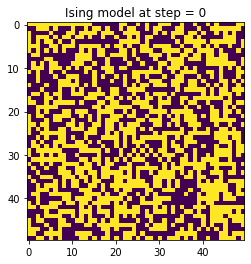

In [4]:
size = 50
sim = IsingModel(size, temp=10)
sim.initialize()
steps = []
mags = []

sim.draw()

In [7]:
for _ in range(1000000):
    sim.update()
    if _ % 100 == 0:
        steps.append(_)
        mags.append(sim.avg_magnetization())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


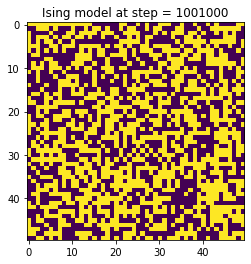

0.0288


Text(0, 0.5, 'Average magnetisation')

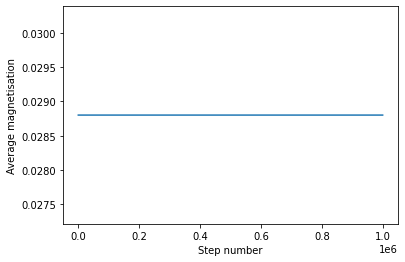

In [8]:
sim.draw()
plt.figure()

print(sim.avg_magnetization())
plt.plot(steps, mags)
plt.xlabel("Step number")
plt.ylabel("Average magnetisation")

### Question to answer

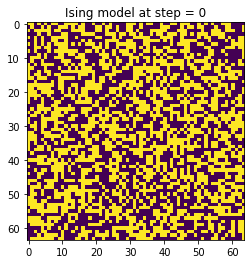

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


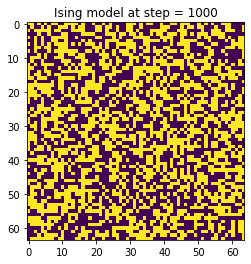

0.0087890625


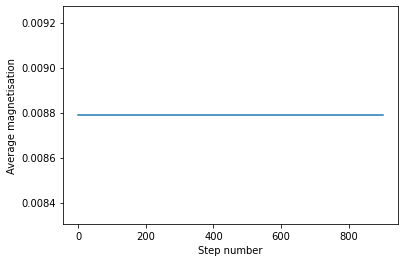

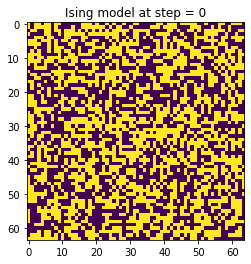

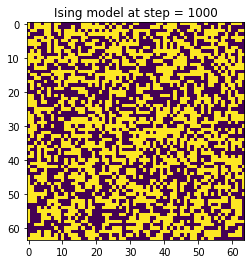

0.0244140625


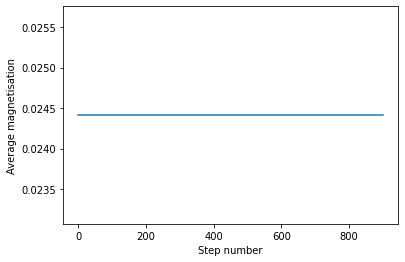

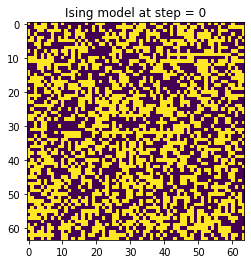

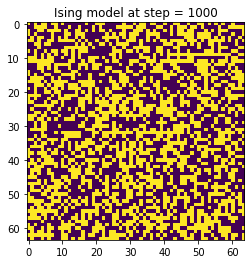

-0.02001953125


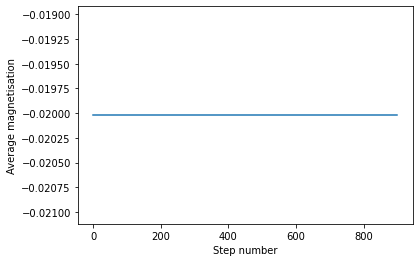

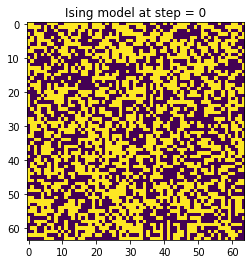

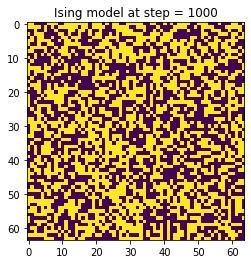

0.0126953125


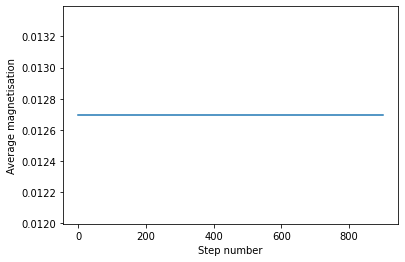

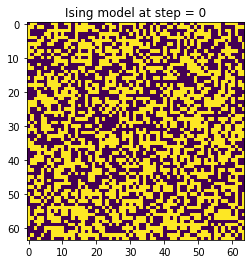

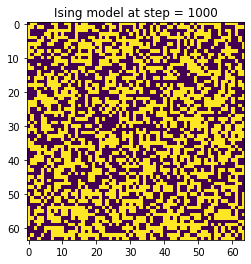

0.01025390625


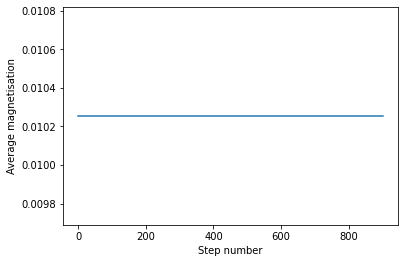

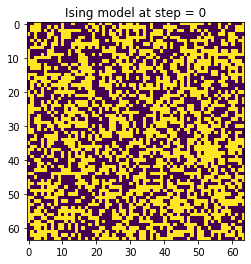

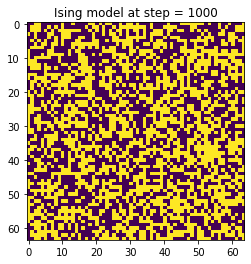

0.01953125


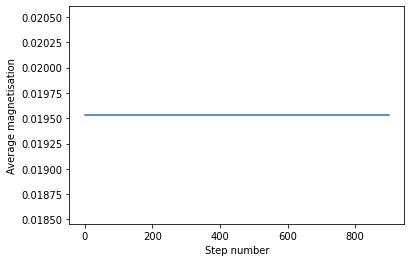

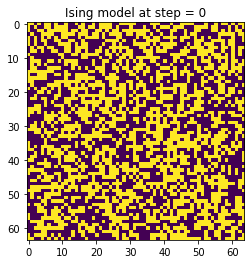

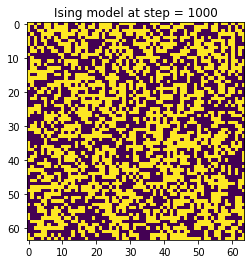

0.01220703125


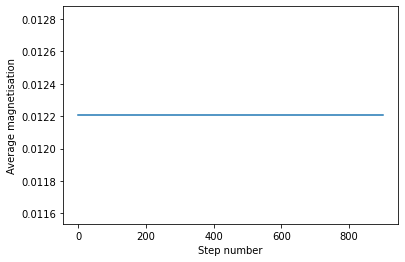

In [ ]:
temperatures = [0, 100, 400, 800, 900, 1100, 1300]
avg_mags = []

size = 64

for temp in temperatures:
    sim = IsingModel(size, temp=10)
    sim.initialize()
    steps = []
    mags = []

    sim.draw()

    for _ in range(1000):
        sim.update()
        if _ % 100 == 0:
            steps.append(_)
            mags.append(sim.avg_magnetization())

    sim.draw()
    plt.figure()

    print(sim.avg_magnetization())
    plt.plot(steps, mags)
    plt.xlabel("Step number")
    plt.ylabel("Average magnetisation")
    plt.show()
    avg_mags.append(sim.avg_magnetization())

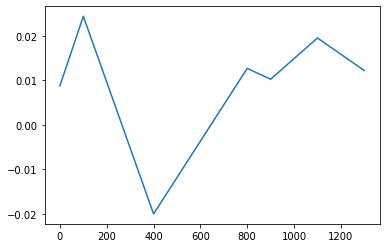

In [ ]:
plt.plot(temperatures, avg_mags)

### Testing with second approach

Icing Model with Temp = 2


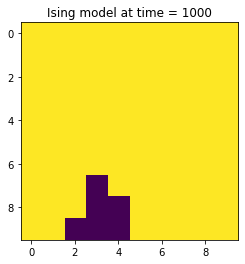

In [ ]:
sim = IsingModel(length = 10, temp = 2)

sim.initialize()

for i in range(1000):
    sim.update_full()

print('Icing Model with Temp =', sim.temp)
sim.draw()

Icing Model with Temp = 1


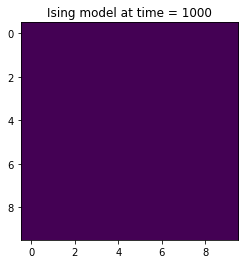

Icing Model with Temp = 2


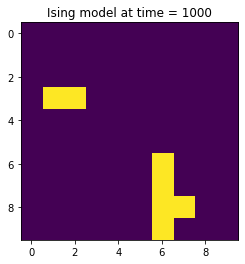

Icing Model with Temp = 3


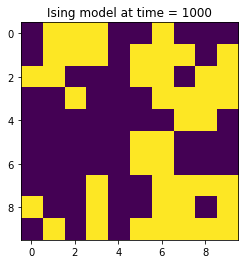

Icing Model with Temp = 4


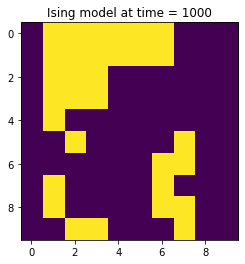

Icing Model with Temp = 5


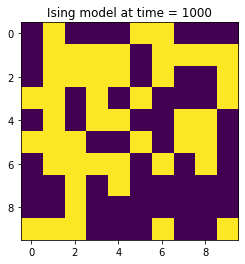

In [ ]:
iter = 100
magnetization = np.zeros((5, iter))

for temp in [1,2,3,4,5]:
    sim = IsingModel(length = 10, temp = temp)
    
    for k in range(iter): 
        sim.initialize()

        for i in range(1000):
            sim.update_full()
        
        magnetization[temp-1, k] = sim.avg_magnetization()
        
    print('Icing Model with Temp =', temp)
    sim.draw()

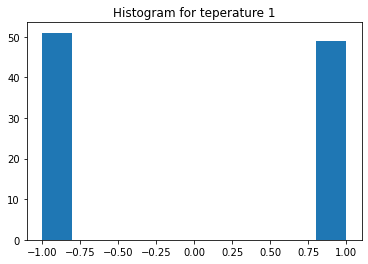

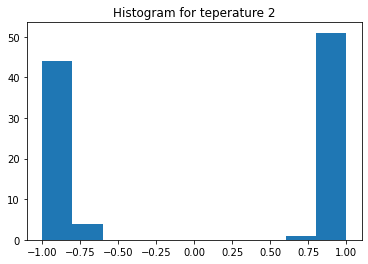

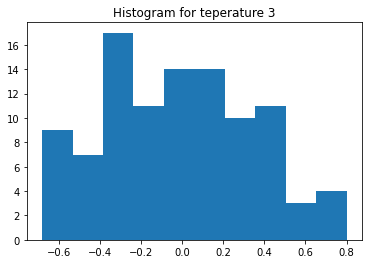

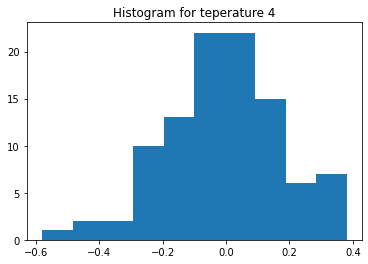

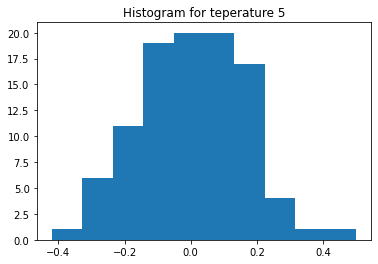

In [ ]:
temp = [1,2,3,4,5]
for i in range(5):
    plt.hist(magnetization[i])
    plt.title(f'Histogram for teperature {temp[i]}')
    plt.show()

4